Apartment Building Registration

Source: https://open.toronto.ca/dataset/apartment-building-registration/

Visualization 1: Correlation Between Number of Storeys and Number of Units

1. What software did you use to create your data visualization?
Python(Matplotlib and Seaborn)

2. Who is your intended audience?
The intended audience includes urban planners, policymakers, and housing developers. These stakeholders need insights into building density trends to design sustainable urban infrastructure and plan housing developments effectively.

3. What information or message are you trying to convey with your visualization?
The scatter plot visualizes the relationship between the number of storeys and the number of units in apartment buildings. The goal is to demonstrate how building height correlates with housing density, providing insights into urban housing patterns.

4. What design principles (substantive, perceptual, aesthetic) did you consider when making your visualization? How did you apply these principles?
- Substantive Principles: Focused on two key quantitative variables: CONFIRMED_STOREYS and CONFIRMED_UNITS. These features are directly relevant to understanding housing density.
- Perceptual Principles: Used a scatter plot with transparency (alpha=0.6) to manage overlapping points, ensuring clear visibility of dense data areas. Added a regression line to help users discern trends.
- Aesthetic Principles: Applied a clean, minimalistic design with a neutral color palette to avoid distractions. Included clear axis labels, a descriptive title, and a grid for better readability.

5. How did you ensure that your data visualizations are reproducible?
Providing Python code that includes data loading, filtering, and visualization steps.
Using open-source libraries (Matplotlib, Seaborn) and publicly available data from Toronto’s Open Data Portal.
Clearly documenting the process with detailed comments.

6. How did you ensure that your data visualization is accessible?
Added descriptive titles, axis labels, and a grid to make the plot easier to interpret.
Used a color scheme that is accessible for color-blind individuals.
Kept the design simple and intuitive, minimizing cognitive load for the audience.

7. Who are the individuals and communities who might be impacted by your visualization?
Urban Planners: Use insights to design housing infrastructure.
Housing Developers: Understand trends in building density to plan future projects.
Residents and Communities: Benefit from better-planned urban environments informed by these insights.

8. How did you choose which features of your chosen dataset to include or exclude from your visualization?
Included:
CONFIRMED_STOREYS and CONFIRMED_UNITS, as they directly address the relationship between building height and housing density.
Excluded:
Variables like AMENITIES_AVAILABLE or HEATING_TYPE, as they are unrelated to the specific research question.

9. What ‘underwater labour’ contributed to your final data visualization product?
Data Cleaning: Filtered out invalid or missing values for CONFIRMED_STOREYS and CONFIRMED_UNITS.
Exploration: Explored the dataset to identify relevant features and relationships.
Testing: Experimented with different plot types (e.g., bar charts, scatter plots) to find the most effective visualization.
Documentation: Added detailed comments and explanations to make the process clear and reproducible.

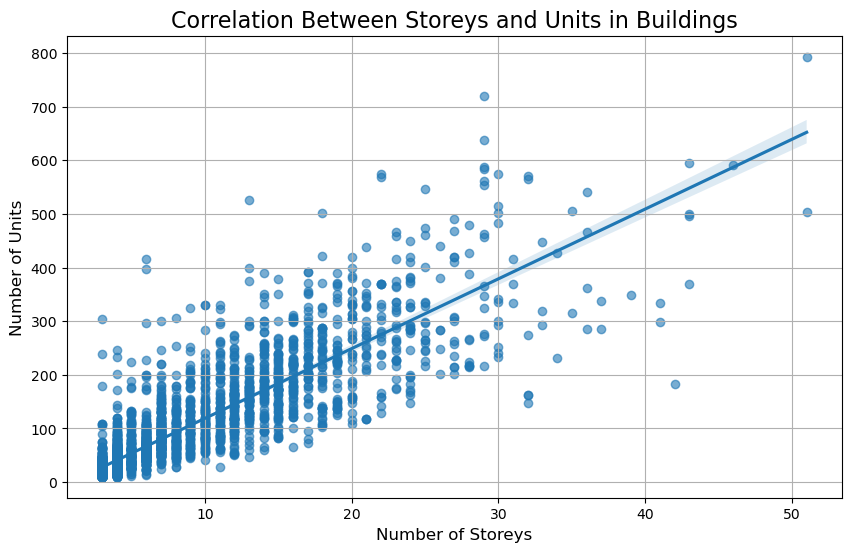

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the path to the file
file_path = os.path.expanduser('~/Downloads/Apartment Building Registration Data.csv')

# Load the dataset
data = pd.read_csv(file_path)

# Filter the dataset to include rows with valid values for CONFIRMED_STOREYS and CONFIRMED_UNITS
# Exclude rows with missing or zero values
data_filtered = data[(data['CONFIRMED_STOREYS'] > 0) & (data['CONFIRMED_UNITS'] > 0)]

# Set the figure size for the scatter plot
plt.figure(figsize=(10, 6))

# Create a scatter plot with a regression line using Seaborn
sns.regplot(
    x='CONFIRMED_STOREYS',  # X-axis: Number of storeys
    y='CONFIRMED_UNITS',    # Y-axis: Number of units
    data=data_filtered,     # Filtered dataset
    scatter_kws={'alpha': 0.6}  # Transparency for overlapping points
)

# Add a title and axis labels to the plot
plt.title('Correlation Between Storeys and Units in Buildings', fontsize=16)
plt.xlabel('Number of Storeys', fontsize=12)
plt.ylabel('Number of Units', fontsize=12)

# Add a grid for better readability
plt.grid()

# Display the plot
plt.show()


Visualization 2: Distribution of Building Amenities

1. What software did you use to create your data visualization?
Python (Matplotlib)

2. Who is your intended audience?
The intended audience includes building managers, residents, and urban developers. They can use the visualization to understand trends in amenities and identify potential gaps in services.

3. What information or message are you trying to convey with your visualization?
The bar chart displays the frequency of amenities available across buildings. It highlights commonly available amenities (e.g., pools, recreation rooms) and rare ones, helping stakeholders plan future improvements.

4. What design principles (substantive, perceptual, aesthetic) did you consider when making your visualization?
- Substantive Principles: Focused on AMENITIES_AVAILABLE because it is directly relevant to understanding building features. Cleaned and aggregated the data for clarity.
- Perceptual Principles: Used a horizontal bar chart for easy comparison of amenity frequencies. Sorted amenities in descending order to direct attention to the most common features.
- Aesthetic Principles: Applied a minimalistic design with a consistent color palette (sky blue) to ensure readability and reduce distractions. Included clear labels, a title, and gridlines for precision.

5. How did you ensure that your data visualizations are reproducible?
Providing Python code that includes data loading, filtering, and visualization steps.
Using open-source libraries (Matplotlib) and publicly available data from Toronto’s Open Data Portal.
Clearly documenting the process with detailed comments.

6. How did you ensure that your data visualization is accessible?
Used a large, readable font for labels and titles.
Included gridlines and axis labels to guide interpretation.
Used high-contrast colors for better readability, especially for users with visual impairments.

7. Who are the individuals and communities who might be impacted by your visualization?
Building Managers: Use insights to enhance amenity offerings.
Residents: Advocate for additional amenities in their buildings.
Developers and Planners: Identify trends to improve building designs and amenities.

8. How did you choose which features of your chosen dataset to include or exclude from your visualization?
Included: AMENITIES_AVAILABLE, as it directly represents building features.
Excluded: Features like YEAR_BUILT or HEATING_TYPE, which are unrelated to the question of amenity distribution.

9. What ‘underwater labour’ contributed to your final data visualization product?
Data Cleaning: Parsed the amenities text data into individual items and handled missing values.
Aggregation: Counted the frequency of amenities and sorted them for clear presentation.
Design Testing: Tried multiple chart types (e.g., pie charts, vertical bar charts) before selecting the horizontal bar chart as the most effective format.

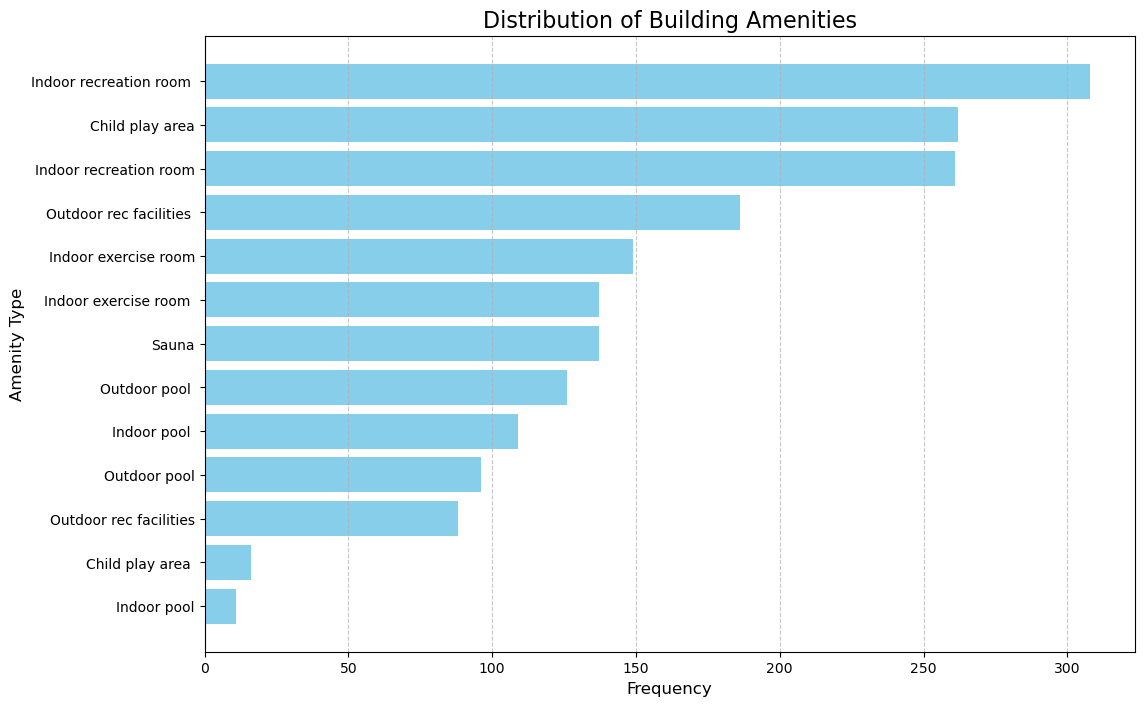

In [4]:
from collections import Counter
import matplotlib.pyplot as plt

# Drop missing values from the AMENITIES_AVAILABLE column and split amenities into lists
amenities_data = data['AMENITIES_AVAILABLE'].dropna().str.split(', ')

# Flatten the list of lists into a single list containing all amenities
all_amenities = [amenity for sublist in amenities_data for amenity in sublist]

# Count the frequency of each unique amenity
amenities_count = Counter(all_amenities)

# Convert the Counter object into a sorted DataFrame
amenities_df = pd.DataFrame(
    amenities_count.items(),  # Convert to (amenity, count) pairs
    columns=['Amenity', 'Count']
).sort_values(by='Count', ascending=False)  # Sort by frequency in descending order

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(
    amenities_df['Amenity'],  # Amenities on the Y-axis
    amenities_df['Count'],    # Frequencies on the X-axis
    color='skyblue'           # Use a visually appealing color
)

# Add a title and axis labels
plt.title('Distribution of Building Amenities', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Amenity Type', fontsize=12)

# Invert the Y-axis so the most frequent amenities appear at the top
plt.gca().invert_yaxis()

# Add a grid for readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.show()